# 연습문제

---

## 목차
1. kaggle의 HR 데이터를 기반으로 타깃(left)을 예상할 수 있는 분류 모델기 생성
2. 차원 축소를 수행한 후 분류 모델기 생성

## 문제 1. kaggle의 HR 데이터를 기반으로 타깃(left)을 예상할 수 있는 분류 모델기 생성

- 데이터 불러오기
- 상관 계수 분석(문자열 데이터 미포함)
- 차원 축소(문자열 데이터 미포함)
- 문자열 원 핫 인코딩
- 상관 계수 분석(문자열 데이터 포함)
- 차원 축소(문자열 데이터 포함)

In [1]:
import os
os.listdir()

['.ipynb_checkpoints',
 '2019-08-01.md',
 'HR_comma_sep.csv',
 'img',
 'ML_Day13.ipynb',
 'PCA.ipynb',
 'PCA_human_resource.ipynb',
 'Untitled.ipynb']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as sns
import matplotlib as mpl
import seaborn as sns

In [112]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [179]:
import matplotlib.pyplot as plt

In [113]:
df = pd.read_csv('HR_comma_sep.csv')

In [114]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [156]:
X = df.loc[:, df.columns.drop(['sales', 'salary'])] # 문자열 데이터들 제거, 추후 left도 제거합니다.
Y = df.loc[:, 'left'] # 타겟 값 저장

In [157]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [158]:
cols = X.columns.drop('left').insert(0,'left')

X_reindex=X.reindex(columns=cols)
X_reindex.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,1,0.38,0.53,2,157,3,0,0
1,1,0.80,0.86,5,262,6,0,0
2,1,0.11,0.88,7,272,4,0,0
3,1,0.72,0.87,5,223,5,0,0
4,1,0.37,0.52,2,159,3,0,0


In [159]:
Y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [160]:
Y.shape

(14999,)

In [132]:
X.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


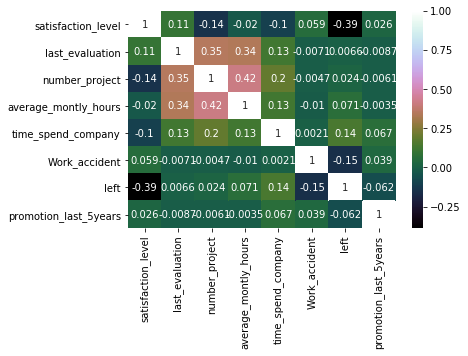

In [134]:
corr = X.corr()
sns.heatmap(corr, cmap='cubehelix', annot=True)
# 퇴사율은 만족도(satisfaction_level)가 낮을 수록 높고, 다른 것은 유의미 하다고 보기 힘들 정도의 작은 값으로 보입니다.

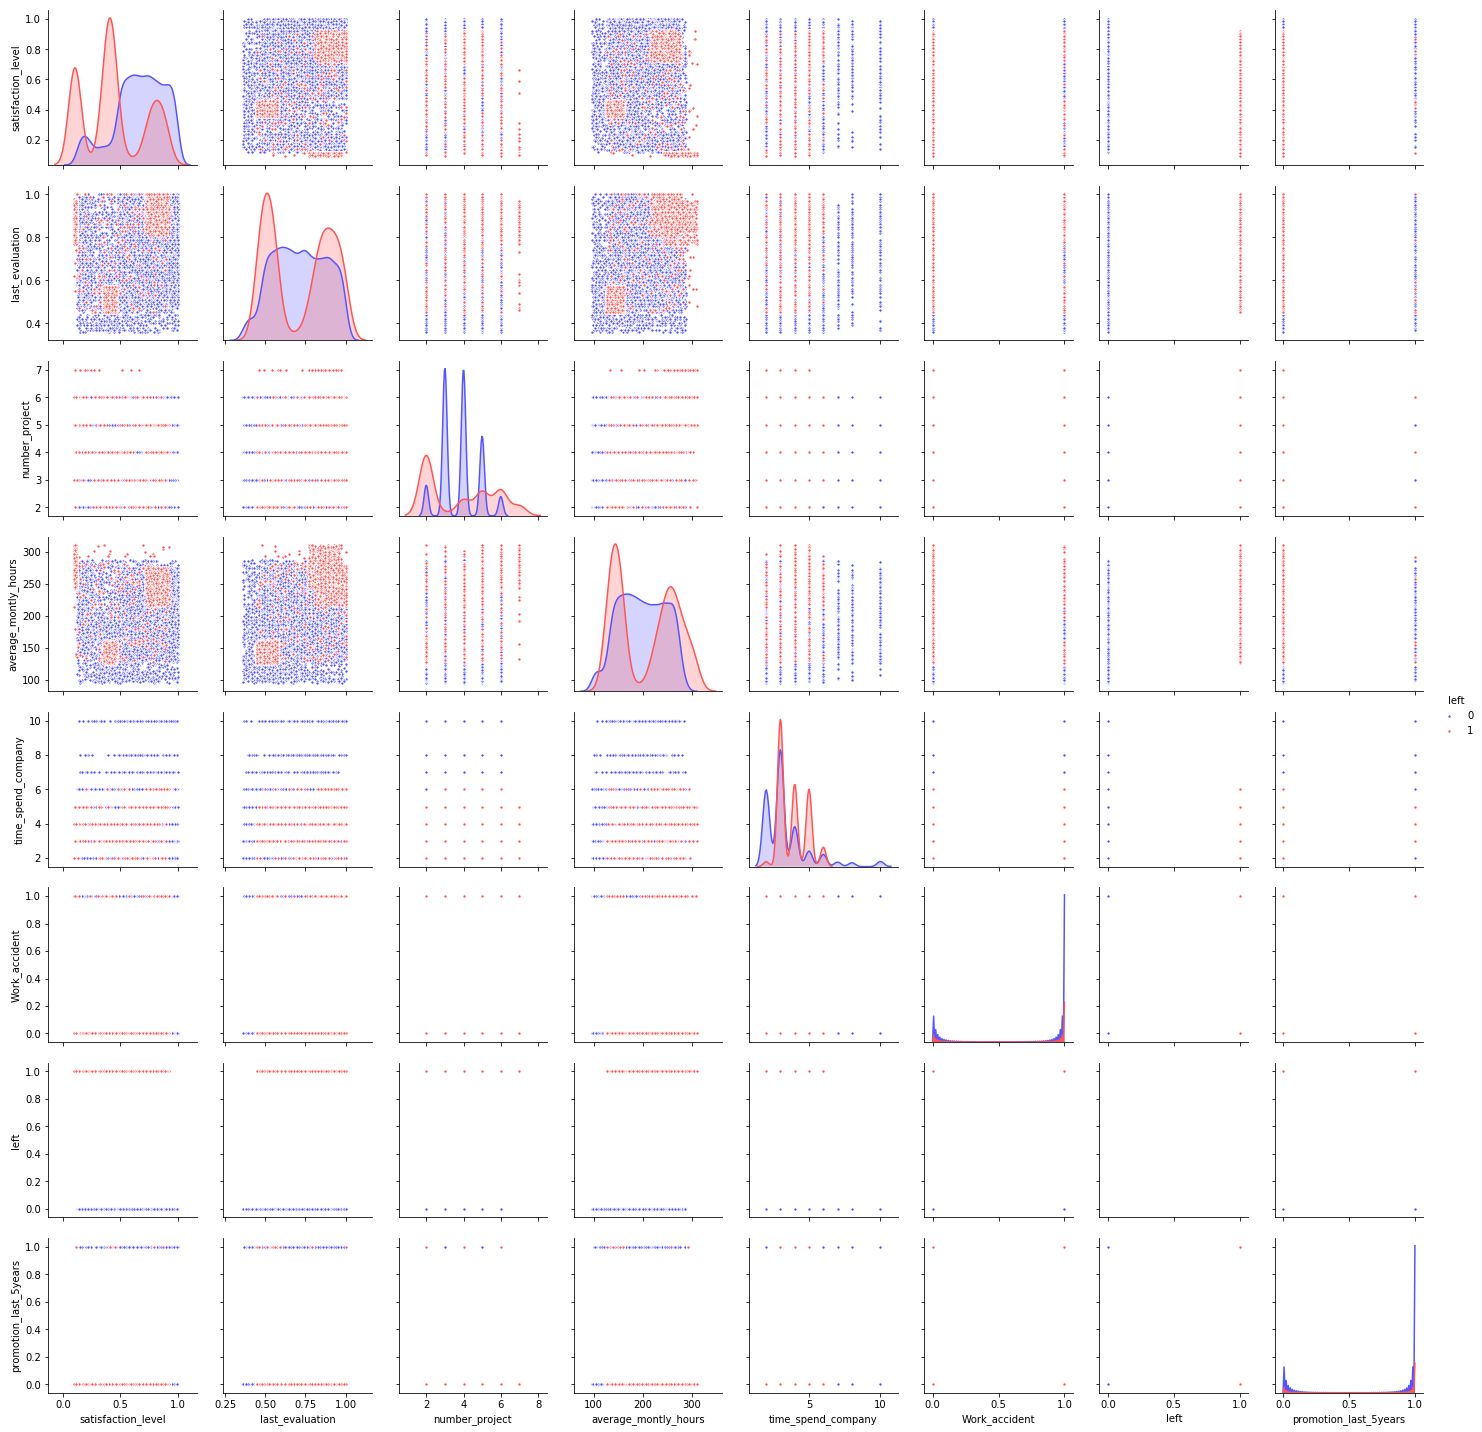

In [172]:
g = sns.pairplot(X, hue='left', palette = 'seismic',diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g

In [183]:
# left와 관련된 차트들을 보면, 제대로 시각화 되지 않았습니다
#TODO: 모양을 좀 더 개선해서 플로팅 하기

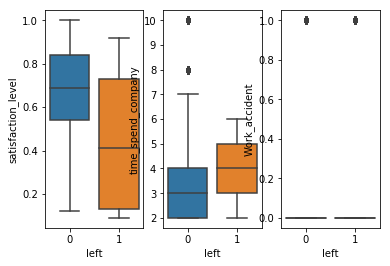

In [215]:
fig = plt.figure()
ax1 = fig.add_subplot(131)
sns.boxplot(x='left', y='satisfaction_level', data=X, ax=ax1)
ax2 = fig.add_subplot(132)
sns.boxplot(x='left', y='time_spend_company', data=X, ax=ax2)
ax3 = fig.add_subplot(133)
sns.boxplot(x='left', y='Work_accident', data=X, ax=ax3)
plt.show()


In [218]:
X.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [227]:
X.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dtype: object

In [229]:
# left: bool. if someone left his/her company, 1 else 0

# satisfaction_level: float, 0.09~1
# last_evaluation: float, 0.36~1
# number_project: int, 2~7
# average_montly_hours: int, 96~310
# time_spend_company: int, 2~10
# Work_accident: bool. if there are accidents, then 1 else 0
# promotion_last_5year: bool. if there is 1 else 0

In [228]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


> 차원 축소(numpy 버젼)

In [137]:
del X['left']

KeyboardInterrupt: 

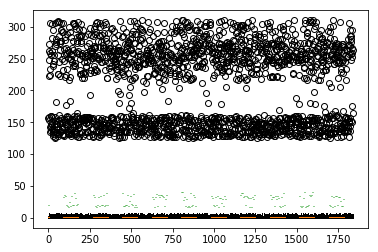

In [184]:
# plt.subplot(551)
plt.boxplot(x=X[['']], showmeans = True, meanline = True)

In [138]:
# 행렬 A를 만들어서 AX = lambda X 수식을 풀어줍니다.
corr = X.corr()
corr.T*corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
satisfaction_level,1.000000,0.011029,0.020440,0.000402,0.010174,0.003445,0.000656
last_evaluation,0.011029,1.000000,0.122033,0.115424,0.017316,0.000050,0.000075
number_project,0.020440,0.122033,1.000000,0.174065,0.038725,0.000022,0.000037
average_montly_hours,0.000402,0.115424,0.174065,1.000000,0.016321,0.000103,0.000013
time_spend_company,0.010174,0.017316,0.038725,0.016321,1.000000,0.000004,0.004547
Work_accident,0.003445,0.000050,0.000022,0.000103,0.000004,1.000000,0.001540
promotion_last_5years,0.000656,0.000075,0.000037,0.000013,0.004547,0.001540,1.000000


In [139]:
A = corr.T * corr

In [140]:
eigVals, eigVecs = np.linalg.eig(A)

In [141]:
# 고유 벡터와 고유 값을 합친 행렬을 생성
dfEig = pd.concat([pd.DataFrame(eigVecs),pd.Series(eigVals)], ignore_index=True, axis=1)
dfEig

,0,1,2,3,4,5,6,7
0,0.069657,0.074518,0.029634,0.559823,-0.660939,-0.414078,-0.258873,1.283910
1,0.510904,0.046203,-0.849252,0.086845,0.077473,0.040351,-0.020982,0.823250
2,0.605305,-0.725941,0.326281,0.009094,0.006921,-0.001150,-0.004904,0.897833
3,0.587545,0.676460,0.411188,0.040680,0.141282,0.080611,-0.001793,0.987507
4,0.150041,0.087830,-0.048480,-0.755105,-0.528223,-0.271814,0.210565,1.008643
5,0.001215,-0.001748,-0.001100,-0.187865,-0.330366,0.671097,-0.636544,0.999137
6,0.002811,-0.002438,0.002443,0.268033,-0.385990,0.544204,0.694976,0.999720


In [142]:
# 고유값(8번째 컬럼)에 의해서 고유벡터들을 정렬합니다.
dfEigSorted = dfEig.sort_values(by=7, ascending=False).reset_index(drop=True)
dfEigSorted

,0,1,2,3,4,5,6,7
0,0.069657,0.074518,0.029634,0.559823,-0.660939,-0.414078,-0.258873,1.283910
1,0.150041,0.087830,-0.048480,-0.755105,-0.528223,-0.271814,0.210565,1.008643
2,0.002811,-0.002438,0.002443,0.268033,-0.385990,0.544204,0.694976,0.999720
3,0.001215,-0.001748,-0.001100,-0.187865,-0.330366,0.671097,-0.636544,0.999137
4,0.587545,0.676460,0.411188,0.040680,0.141282,0.080611,-0.001793,0.987507
5,0.605305,-0.725941,0.326281,0.009094,0.006921,-0.001150,-0.004904,0.897833
6,0.510904,0.046203,-0.849252,0.086845,0.077473,0.040351,-0.020982,0.823250


In [143]:
dfEigSorted[7]/7 # 

0    0.183416
1    0.144092
2    0.142817
3    0.142734
4    0.141072
5    0.128262
6    0.117607
Name: 7, dtype: float64

In [144]:
dfEigSorted[7].cumsum()

0    1.283910
1    2.292554
2    3.292274
3    4.291411
4    5.278918
5    6.176750
6    7.000000
Name: 7, dtype: float64

In [145]:
sorted_vecs = np.matrix(dfEigSorted.iloc[:, :7], dtype=np.float)
sorted_vecs
sorted_vals = np.array(dfEigSorted.iloc[:, 7])
sorted_vals

array([1.28391042, 1.00864329, 0.99972023, 0.99913666, 0.98750702,
       0.89783272, 0.82324965])

In [109]:
sorted_vecs[0].dot(sorted_vals.T)

matrix([[-0.50640472]])

In [54]:
eigLst[2]

array([[-0.67947019, -0.29526049, -0.113401  , -0.09987994, -0.03888184,
         0.10930225,  0.13860196,  0.62899637],
       [-0.84530701, -0.50616965, -0.08838371, -0.0438909 , -0.03794074,
        -0.02579719,  0.08343598,  0.10219445],
       [-0.60083636, -0.00618589, -0.00220336,  0.00496991,  0.07492681,
         0.30247765,  0.31628632,  0.66466838],
       [-0.61918541, -0.58183586, -0.26819936, -0.05188566, -0.04254127,
         0.1004202 ,  0.11207458,  0.42308244],
       [-0.84868532, -0.15580756, -0.10094469, -0.09897614, -0.05031435,
         0.0095124 ,  0.29556488,  0.38143218],
       [-0.94560556, -0.23671052, -0.1241537 , -0.03047259, -0.00997419,
        -0.00876333,  0.09097213,  0.15812441],
       [-0.69784137, -0.65161145, -0.08381643, -0.03041717,  0.00424368,
         0.04386216,  0.04770458,  0.2761375 ],
       [-0.02444184, -0.004149  , -0.00208464,  0.00131817,  0.01282073,
         0.04868325,  0.42663139,  0.90267963]])

AttributeError: 'int' object has no attribute 'any'

In [27]:
eigLst[1]

array([[-0.67947019, -0.29526049, -0.113401  , -0.09987994, -0.03888184,
         0.10930225,  0.13860196,  0.62899637],
       [-0.84530701, -0.50616965, -0.08838371, -0.0438909 , -0.03794074,
        -0.02579719,  0.08343598,  0.10219445],
       [-0.60083636, -0.00618589, -0.00220336,  0.00496991,  0.07492681,
         0.30247765,  0.31628632,  0.66466838],
       [-0.61918541, -0.58183586, -0.26819936, -0.05188566, -0.04254127,
         0.1004202 ,  0.11207458,  0.42308244],
       [-0.84868532, -0.15580756, -0.10094469, -0.09897614, -0.05031435,
         0.0095124 ,  0.29556488,  0.38143218],
       [-0.94560556, -0.23671052, -0.1241537 , -0.03047259, -0.00997419,
        -0.00876333,  0.09097213,  0.15812441],
       [-0.69784137, -0.65161145, -0.08381643, -0.03041717,  0.00424368,
         0.04386216,  0.04770458,  0.2761375 ],
       [-0.02444184, -0.004149  , -0.00208464,  0.00131817,  0.01282073,
         0.04868325,  0.42663139,  0.90267963]])

In [46]:
eigLst[0] = np.sort(eigLst[0])[::-1]

In [37]:
explained_variance = eigLst[0].cumsum()
explained_variance_ratio_ = explained_variance / max(explained_variance)
explained_variance_ratio_

array([0.16066819, 0.3048436 , 0.40715578, 0.51372023, 0.62598327,
       0.74982412, 0.87507232, 1.        ])